In [ ]:
                                                Insurance Claim Fraud Detection
Insurance fraud is a significant problem in the industry, leading to financial losses and increased premiums for 
legitimate customers.
    This project focuses on predicting whether an insurance claim is fraudulent or not using machine learning techniques.
The data provided includes customer details, policy information, accident information, and claim details.
The objective is to develop a model that identifies potentially fraudulent claims.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13

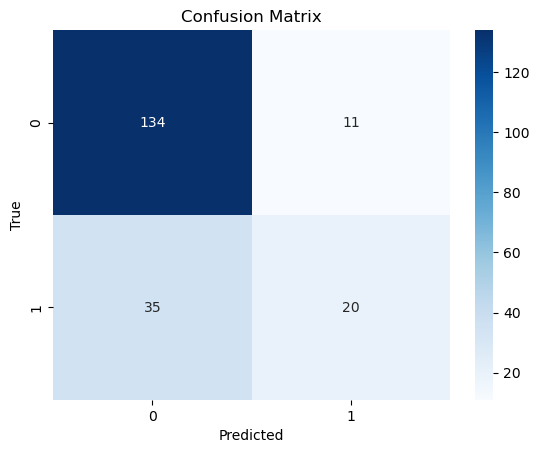

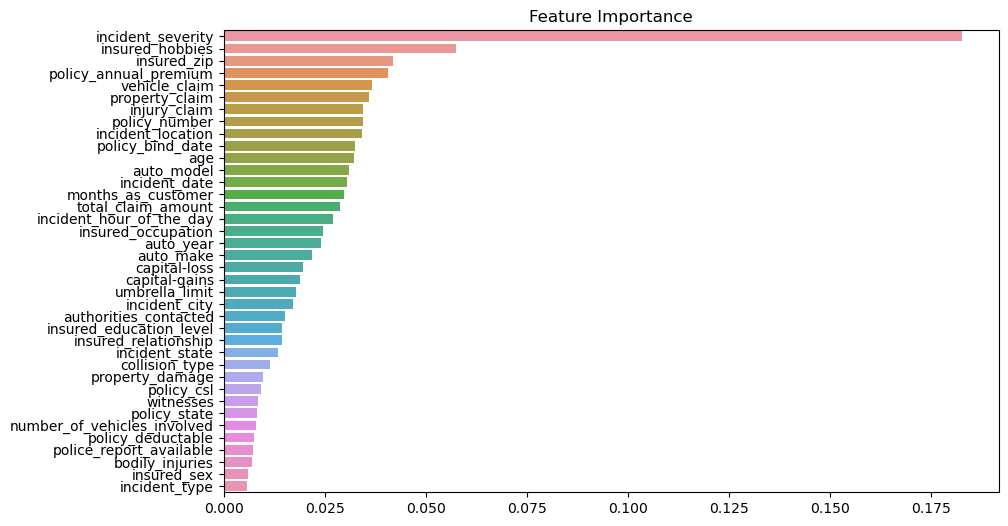

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Dataset
data_url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
data = pd.read_csv(data_url)

# Step 2: Data Exploration
print("Dataset Information:")
print(data.info())  # Basic information about the dataset

print("\nSummary Statistics:")
print(data.describe())  # Summary statistics

print("\nMissing Values:")
print(data.isnull().sum())  # Checking for missing values

# View the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Step 3: Data Preprocessing
# Remove any leading/trailing whitespaces in column names and values
data.columns = data.columns.str.strip()
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Drop unnecessary columns (if any)
# Example: Drop columns that might not be needed for modeling
data = data.drop(columns=['_c39'], errors='ignore')

# Encode categorical features using Label Encoding for simplicity
le = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = le.fit_transform(data[column])

# Separate features (X) and target variable (y)
X = data.drop(['fraud_reported'], axis=1)  # 'fraud_reported' is the target variable
y = data['fraud_reported']

# Step 4: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Model Building - Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Predicting on test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Feature Importance Visualization
# Display the importance of features in the RandomForest model
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()


In [ ]:
Project Steps
Data Loading:
Load the dataset from the provided URL and inspect its structure.
Data Exploration:
Explore the dataset to understand its features, check for missing values, and identify categorical and numerical variables.
Data Cleaning & Preprocessing:
Remove unnecessary columns or rows with missing data.
Encode categorical variables using LabelEncoder or OneHotEncoder.
Normalize numerical features using StandardScaler.
Feature Engineering:
Create new features or modify existing features to improve model performance.
Model Building:
Split the dataset into training and testing sets.
Train multiple machine learning models (e.g., Random Forest, Logistic Regression) to identify fraudulent claims.
Model Evaluation:
Evaluate model performance using metrics like accuracy, precision, recall, F1-score, and confusion matrix.
Select the best-performing model based on evaluation metrics.
Visualization:
Create visualizations to understand the distribution of fraudulent and non-fraudulent claims.
Display a confusion matrix and ROC curve to evaluate model predictions.
